# Project Scope

- Understanding of Data
- Price Distribution based on Genre
- Price Distribution of Apps (top 5 Genre )
- Do they launch paid apps only in gaming category ?
- Are paid apps good enough ?
- As the size of the app increases do they get pricier ?
- Categorization of Apps based on Genre
- Categorization of Apps based on Genre with Free and Paid Split
- Rating (Upgrade/degrade) based on version update



# 1- Understanding of Data

In [1]:
import pandas as pd
apple = pd.read_csv('/Users/shekhartanwar/Downloads/Notebook/Apple App Store/app-store-apple-data-set-10k-apps/AppleStore.csv')

In [2]:
apple.columns = ['id','apps','size_bytes','currency','price','rating_count_tot','rating_count_ver','user_rating','user_rating_ver','ver','cont_rating','prime_genre','sup_devices','ipadSC','lang_support','vpp_lic']

In [3]:
apple.head(5)

,id,apps,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices,ipadSC,lang_support,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
import matplotlib.pyplot as plt

x = apple['price']

apple.price.value_counts()

df = apple[apple['price'] != 0]



In [5]:
df.head(10)

,id,apps,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices,ipadSC,lang_support,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1
10,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1
11,284815117,SCRABBLE Premium,227547136,USD,7.99,105776,166,3.5,2.5,5.19.0,4+,Games,37,0,6,1
14,284862767,FreeCell,55153664,USD,4.99,6340,668,4.5,4.5,4.0.3,4+,Games,38,5,2,1
19,285005463,Crash Bandicoot Nitro Kart 3D,10735026,USD,2.99,31456,4178,4.0,3.5,1.0.0,4+,Games,47,0,1,1
20,285946052,iQuran,70707916,USD,1.99,2929,966,4.5,4.5,3.3,4+,Reference,43,0,2,1
21,285994151,:) Sudoku +,6169600,USD,2.99,11447,781,5.0,5.0,5.2.6,4+,Games,40,5,1,1


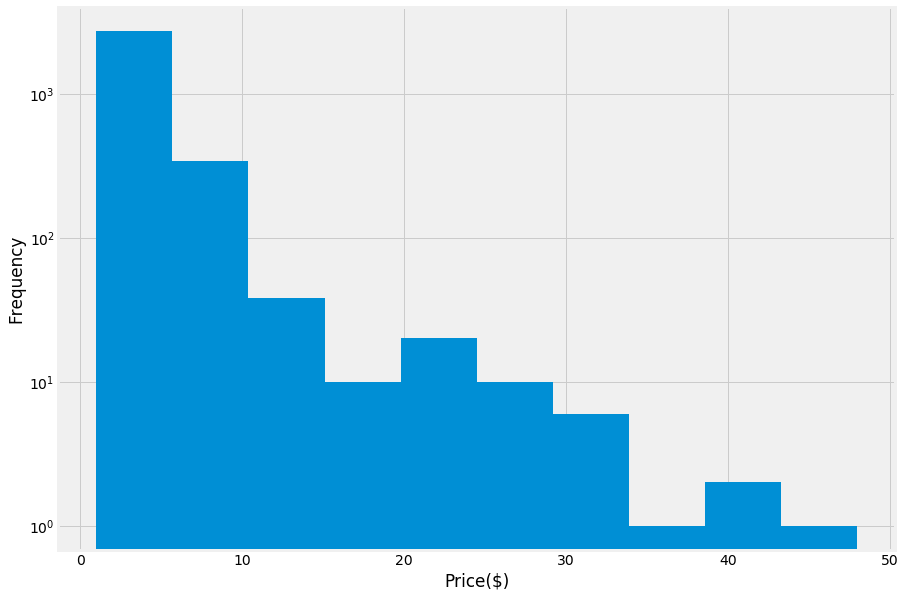

In [6]:


plt.figure(figsize = (15,10))
plt.style.use("fivethirtyeight")
dfa = df[df['price'] < 49.99]
plt.xlabel('Price($)')
dfa.price.plot(kind = 'hist',log = True)

# Intuition : 

Most apps with maxx price < 49.99 lie in the $(0-5) range, as the price of the apps increase the frequency count decrease, as is evident from the histogram.

As the price increases the frequency count decreases which indicates that ideally price should be lower or equal to $30, after that, the Frequency Count decreases exponentially


# 2 - Price Distribution based on Category

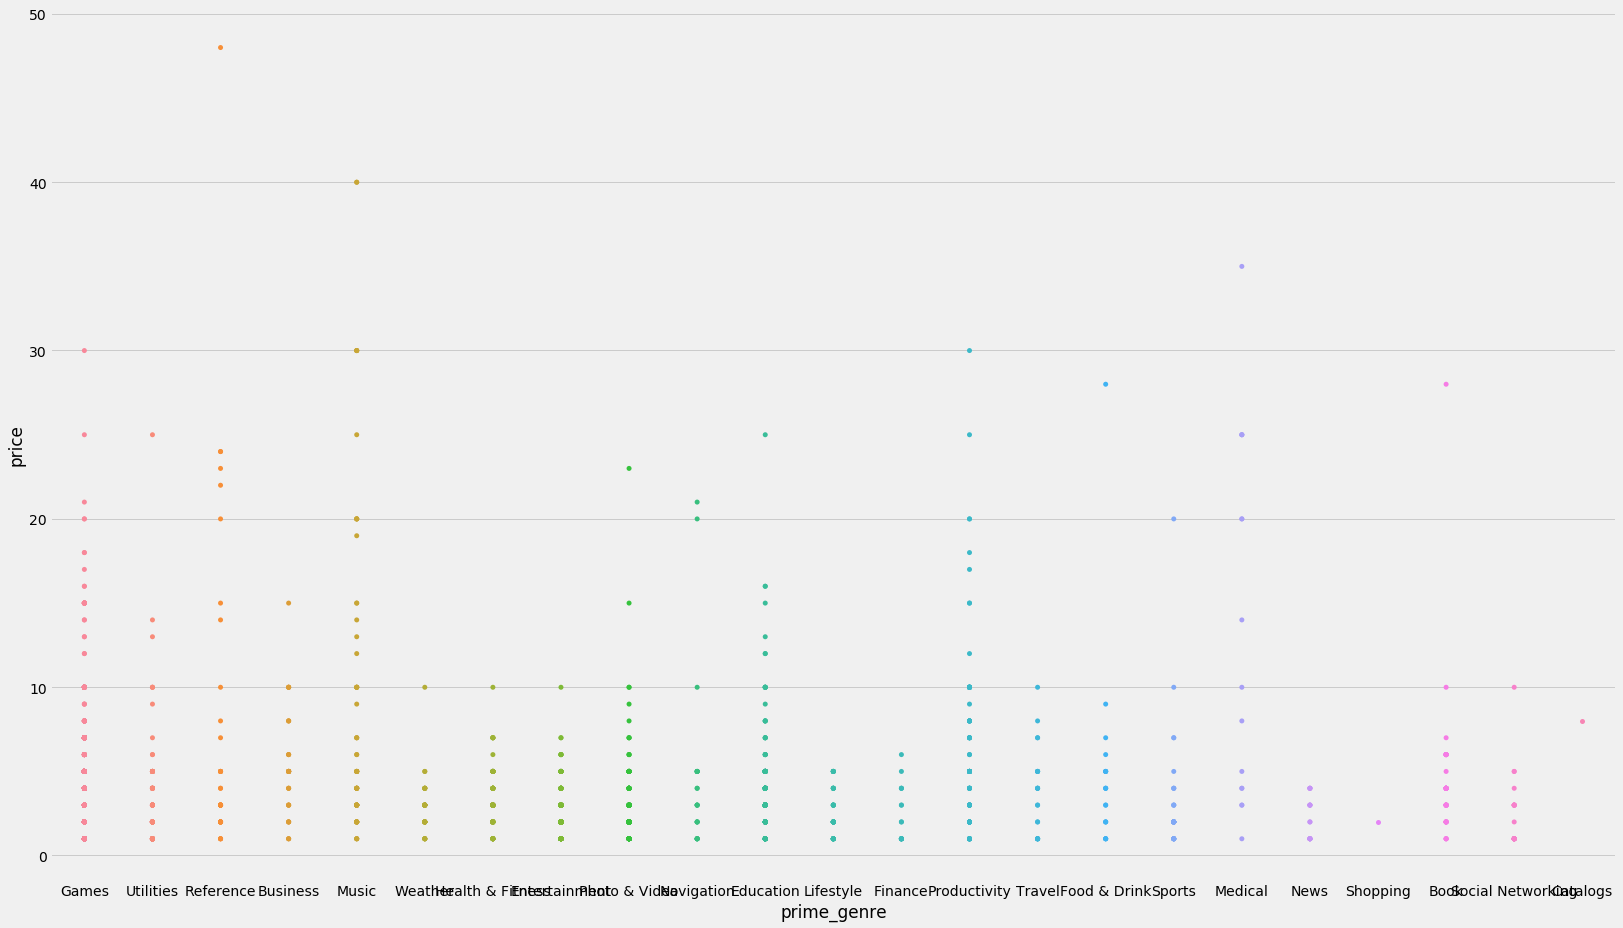

In [7]:
plt.figure(figsize = (25,15))
import seaborn as sns
sns.stripplot(data = dfa,y = 'price', x = 'prime_genre')

# Intuition :

With threshhold of $30, the most highly priced apps are in the following Genres :
- Games
- Reference
- Music
- Productivity
- Medical

# 3 - Price Distribution of Apps - Top 5 Categories

In [8]:
dfa.prime_genre.value_counts()

Games                1605
Education             317
Entertainment         201
Photo & Video         182
Utilities             139
Productivity          115
Health & Fitness      104
Music                  70
Lifestyle              50
Book                   46
Reference              44
Weather                41
Sports                 35
Business               35
Navigation             25
Travel                 25
Social Networking      24
Food & Drink           20
Finance                20
News                   17
Medical                15
Catalogs                1
Shopping                1
Name: prime_genre, dtype: int64

In [9]:
df_games = dfa[dfa['prime_genre'] == 'Games']
df_edu = dfa[dfa['prime_genre'] == 'Education']
df_pv = dfa[dfa['prime_genre'] == 'Photo & Video']
df_ut = dfa[dfa['prime_genre'] == 'Utilities']
df_hf = dfa[dfa['prime_genre'] == 'Productivity']

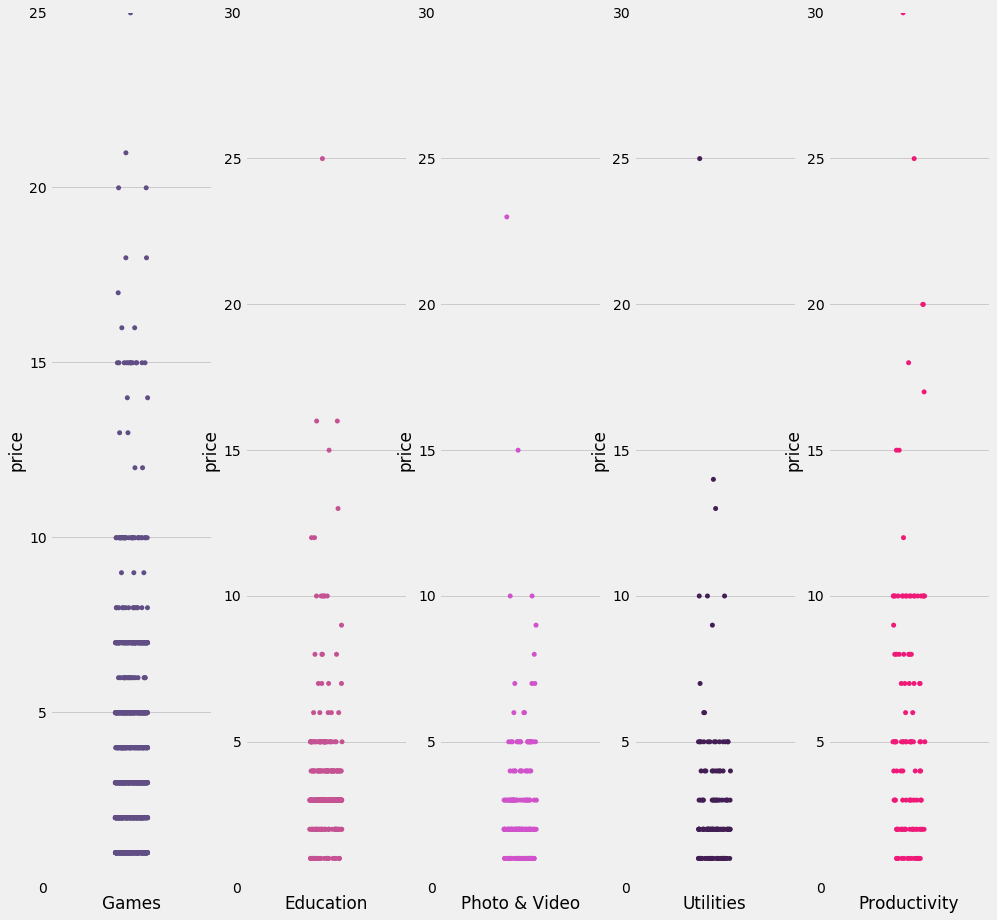

In [10]:
plt.figure(figsize = (15,15))
yrange = [0,30]

# add colors later
# add labels later

plt.subplot(1,5,1)
plt.ylim([0,25])
sns.stripplot(data = df_games, y = 'price', jitter = True, color = '#604e85', )
plt.xlabel('Games')

plt.subplot(1,5,2)
plt.ylim(yrange)
sns.stripplot(data = df_edu, y = 'price', jitter = True , color = '#c55292')
plt.xlabel('Education')

plt.subplot(1,5,3)
plt.ylim(yrange)
sns.stripplot(data = df_pv, y = 'price', jitter = True, color = '#d053cb')
plt.xlabel('Photo & Video')


plt.subplot(1,5,4)
plt.ylim(yrange)
sns.stripplot(data = df_ut, y = 'price', jitter = True, color = '#431e54')
plt.xlabel('Utilities')

plt.subplot(1,5,5)
plt.ylim(yrange)
sns.stripplot(data = df_hf, y = 'price', jitter = True, color = '#EF1A78')
plt.xlabel('Productivity')


plt.show()


# 4 - Do they launch paid apps only in gaming category ?

Tagging lower priced values with "other"

In [11]:
l = df.prime_genre.value_counts().index[:4]

def catag(x):
    if x in l:
        return x
    else:
        return "Other"
    
    
apple['broad_genre'] = apple.prime_genre.apply(lambda x: catag(x))

Calculating the trotal apps by Category, and paid and free apps in those categories respectively

In [12]:
apple.drop(labels = ['broad_genre'], axis = 1)

data = pd.DataFrame(apple['broad_genre'].value_counts())

data.sort_index()

free  = apple[apple['price'] == 0].broad_genre.value_counts().to_frame(name = 'free').sort_index()
free

,free
Education,132
Entertainment,334
Games,2257
Other,1166
Photo & Video,167


In [13]:
paid = apple[apple['price']!= 0].broad_genre.value_counts().to_frame(name =  'paid').sort_index()
paid

,paid
Education,321
Entertainment,201
Games,1605
Other,832
Photo & Video,182


In [14]:
data_price = data.join(free).join(paid)
data_price

,broad_genre,free,paid
Games,3862,2257,1605
Other,1998,1166,832
Entertainment,535,334,201
Education,453,132,321
Photo & Video,349,167,182


In [15]:
data_price.columns = ['total','free','paid']

In [16]:

data_price['free%'] = data_price['free'] * 100/data_price['total']
data_price['paid%'] = data_price['paid']*100/data_price['total']


In [17]:
data_price

,total,free,paid,free%,paid%
Games,3862,2257,1605,58.441222,41.558778
Other,1998,1166,832,58.358358,41.641642
Entertainment,535,334,201,62.429907,37.570093
Education,453,132,321,29.139073,70.860927
Photo & Video,349,167,182,47.851003,52.148997


In [43]:
f = data_price['free'].sort_index()
p = data_price['paid'].sort_index()

In [18]:
df_price = data_price[['free%','paid%']]

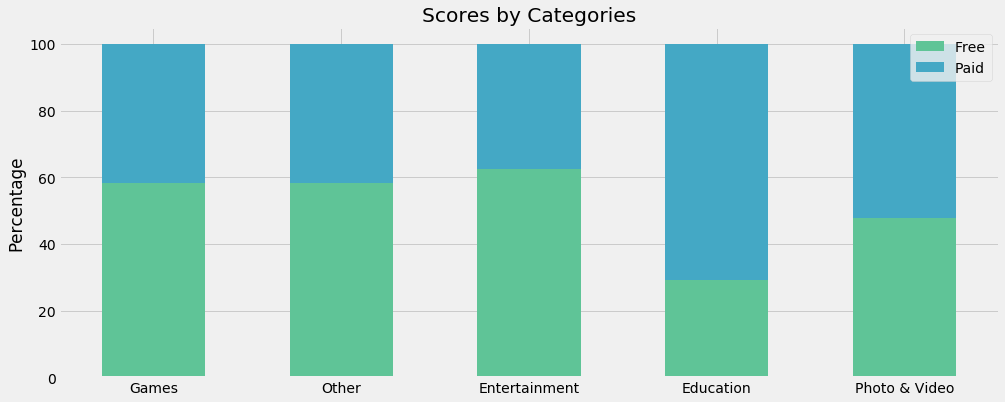

In [19]:

plt.figure(figsize =(15,6))
free_tuple = tuple(data_price['free%'].tolist())
paid_tuple = tuple(data_price['paid%'].tolist())

import numpy as np
import matplotlib.pyplot as plt



N = 5

ind = np.arange(N)    # the x locations for the groups
width = 0.55      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, free_tuple, width,color  ='#5fc497')
p2 = plt.bar(ind, paid_tuple, width,
             bottom=free_tuple, color = '#44a8c5')

plt.ylabel('Percentage')
plt.title('Scores by Categories')
plt.xticks(ind, ('Games', 'Other', 'Entertainment', 'Education', 'Photo & Video'))
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))



plt.show()




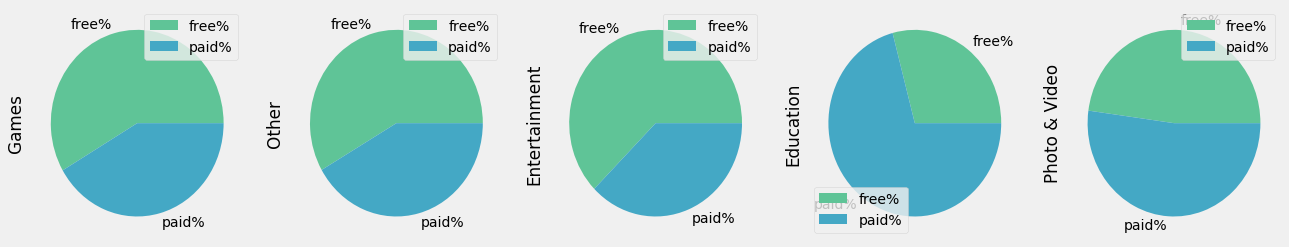

In [20]:


df_price.T.plot.pie(subplots = True, figsize = (20,4), colors = ['#5fc497','#44a8c5'] )
plt.show()

# Insights
   
- Education has the lest free apps followed by Photo & Video   

In [21]:
def check(x):
    if(x == 0):
        return "free"
    else:
        return "paid"

apple['Status'] = pd.DataFrame(apple.price.apply(lambda x : check(x)))



# 5 - Are paid apps good enough ?

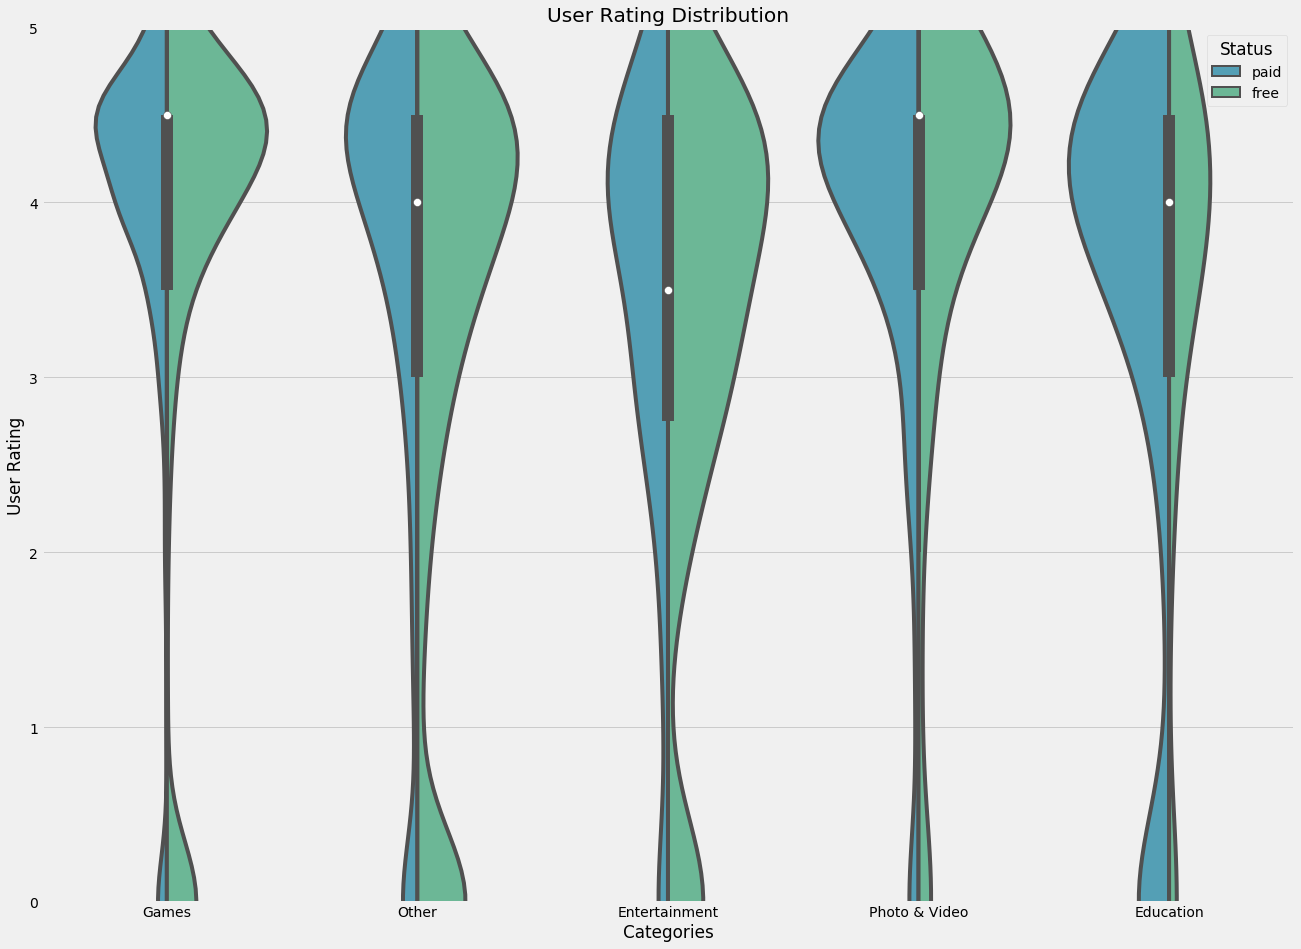

In [22]:

plt.figure(figsize = (20,15))
plt.ylim(0,5)
sns.violinplot(data = apple, y = 'user_rating', x = 'broad_genre', hue = 'Status', split = True, scale = 'count', palette= ['#44a8c5','#5fc497'] )
plt.style.use("fast")
plt.xlabel('Categories')
plt.ylabel('User Rating')
plt.title('User Rating Distribution')
plt.show()

# Insights
        
- For Games and Photo & Video Genres, the median rating of the apps is approximately 4.5, which suggests that they are better

# 6 - As the size of the app increases do they get pricier ?

In [23]:
def size(x):
    mb = x/1000000
    return mb
    
apple['size_mb'] = apple.size_bytes.apply(lambda x : size(x))
apple.head(5)

,id,apps,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices,ipadSC,lang_support,vpp_lic,broad_genre,Status,size_mb
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,Games,paid,100.788224
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Other,free,158.578688
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Other,free,100.524032
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,Other,free,128.512000
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Other,free,92.774400


<Figure size 1080x720 with 0 Axes>

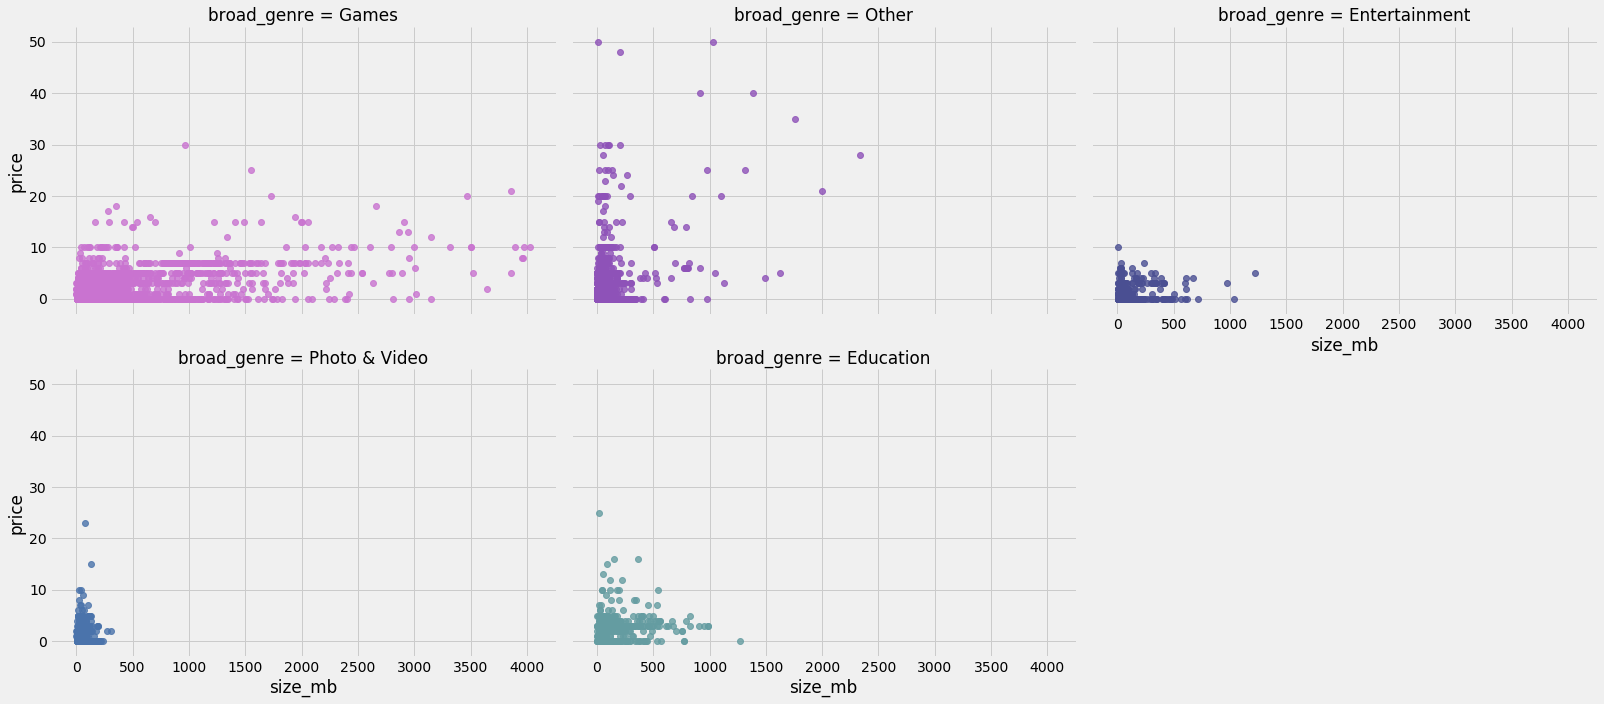

In [24]:
plt.figure(figsize = (15,10))
paid_apps_desc = apple[apple['price'] <50]
sns.lmplot(data = paid_apps_desc, x = 'size_mb', y = 'price', col = 'broad_genre',col_wrap= 3,aspect= 1.5
           ,scatter = True,fit_reg = False, hue  = 'broad_genre', legend_out = True, palette = ['#c973d0' , '#8e52b8' , '#4a4f92', '#4a73ab' , '#649ca1'] )



plt.show()

# Insights
- The relation between Price and Genere suggest that there exists no relation between app size and price

# 7- Categorization of Apps based on Genre

[None, None, None, None, None, None, None, None, None, None]

<Figure size 1440x1440 with 0 Axes>

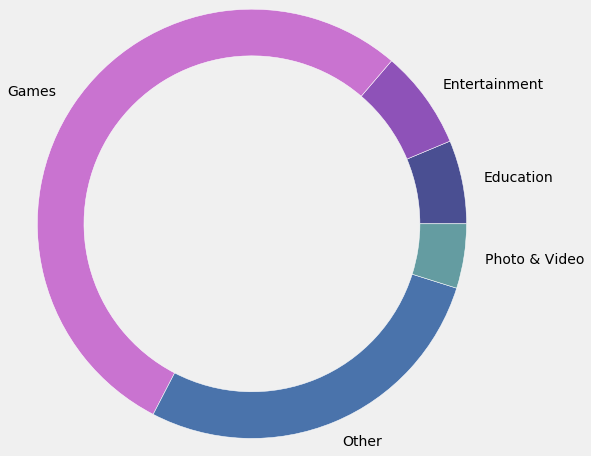

In [44]:

plt.figure(figsize = (20,20))



group_names= apple.broad_genre.value_counts().sort_index().index

group_size = apple.broad_genre.value_counts().sort_index().tolist()

x = ['Free','Paid']
subgroup_names = 5*x
subgroup_size = [f[0],p[0],f[1],p[1], f[2],p[2],f[3],p[3],f[4],p[4]]

col = ['#5fc497','#44a8c5', '#5fc497','#44a8c5' , '#5fc497','#44a8c5', '#5fc497','#44a8c5', '#5fc497','#44a8c5']

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.3, labels=group_names, colors = ['#4a4f92','#8e52b8','#c973d0','#4a73ab','#649ca1']) 
plt.setp( mypie, width=0.5, edgecolor='white')
 

### - Intuition

- Games apps were the higest in number followed by Other and Entertainment

# 8 - Categorization of Apps based on Genre with Free and Paid Split

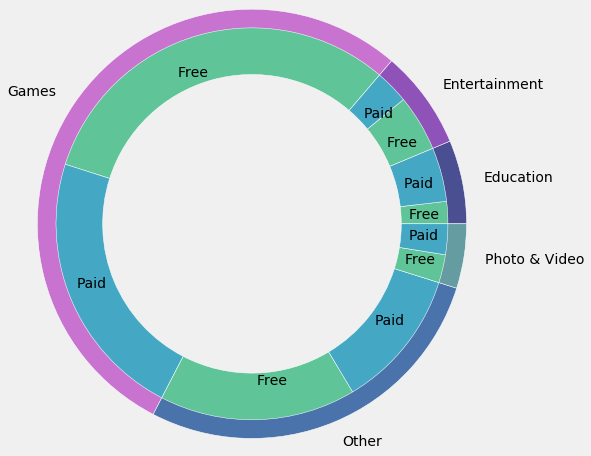

In [45]:
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius= 2.3, labels=group_names, colors = ['#4a4f92','#8e52b8','#c973d0','#4a73ab','#649ca1']) 
plt.setp( mypie, width=0.5, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.3-0.2, labels=subgroup_names, labeldistance=0.8, colors= col)
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


In [40]:
group_size

[453, 535, 3862, 1998, 349]

In [41]:
group_names

Index(['Education', 'Entertainment', 'Games', 'Other', 'Photo & Video'], dtype='object')

### Intuition
- Maximum percentage of Free apps were in the Game, Other and Entertainment Genre
- Maximum percentage of Paid apps were in the Game, Other and Education Genre

# 9 - Rating (Upgrade/degrade) based on version update

In [ ]:
apple[(apple.user_rating_ver  < apple.user_rating) & (apple.rating_count_ver/apple.rating_count_tot > 0.5)].prime_genre.value_counts()

In [ ]:
apple[apple.rating_count_ver/apple.rating_count_tot > 0.5].prime_genre.value_counts()

# Intuition

Though it may seem at firs that that the games category is highly sensisitive to consumer behaviour as the number of applications which appears to have degraded in their new verison were from the Games category, yet when we divide the count of apps by the total apps which cross the 50% threshold, we obseerve that the apps which are most senstitive are  
Entertainment
Photo & Video
and Games

# Fin!